<a href="https://colab.research.google.com/github/MileneCV/sales_predictions/blob/main/10_6_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project 1 -  Sales predictions 
Milene Carmes Vallejo




## Loading Data

In [94]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

filename = '/content/drive/My Drive/sales_predictions.csv'
df_sales = pd.read_csv(filename)

df_sales.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning


1 -  How many rows and columns?

In [95]:

print('rowns, columns')
df_sales.shape

rowns, columns


(8523, 12)

2 - What are the datatypes of each variable

In [96]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3- Are there duplicates? If so, drop any duplicates

In [97]:
check_duplicate = df_sales.duplicated().sum()
if check_duplicate == 0:
  print('no duplicate')
else:
  print(f'(there are {check_duplicate} duplicates')


no duplicate


4 - Identify missing values.


In [98]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [99]:
# I don't think Item_weight and Outlet size is an important information, I will just drop these columns
num_missing_weight = df_sales['Item_Weight'].isna().sum()
total_rows = df_sales.shape[0]
percent_missing_weight = (num_missing_weight)*100/total_rows
print(f'{percent_missing_weight.round(2)}% of the data in the Item_weight column is missing')

num_missing_size = df_sales['Outlet_Size'].isna().sum()
total_rows = df_sales.shape[0]
percent_missing_size = (num_missing_size)*100/total_rows
print(f'{percent_missing_size.round(2)}% of the data in the Item_size column is missing')


17.17% of the data in the Item_weight column is missing
28.28% of the data in the Item_size column is missing


In [100]:
df_sales.drop(columns=['Item_Weight', 'Outlet_Size'],  inplace=True)

 6 - Confirm that there are no missing values after addressing them.

In [101]:
df_sales.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

 7 - Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

In [102]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [103]:
# this code will fiter out the object type columns and creates a list of each of column names as an index
df_sales_types = df_sales.dtypes
str_cols = df_sales_types[df_sales_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [104]:
# This for loop prints out each column name and then lists each category
# in the column along with the counts of each category
for col in str_cols:
  print(f'- {col}:')
  print(df_sales[col].value_counts(dropna=False))
  print('\n')


- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926


In [105]:
# something is wrong with "Item_fat_content"
# replace to be 2 type : Low Fat and Regular
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('LF', 'Low Fat')
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('reg', 'Regular')
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8 - For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [106]:
df_sales.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals

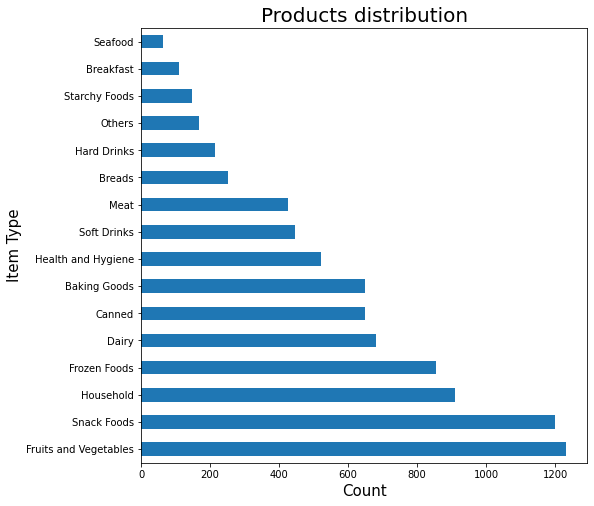

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# check types of products 

types = df_sales['Item_Type'].value_counts()
types.plot(kind='barh', figsize=(8,8))
plt.ylabel('Item Type', fontsize=15)

plt.xlabel('Count', fontsize=15)
plt.title('Products distribution', fontsize=20)
plt.show()

In the stores that we are study there are more fruit/vegetables and snack foods(about 1200) and less sea food and breakfast (about 100).  

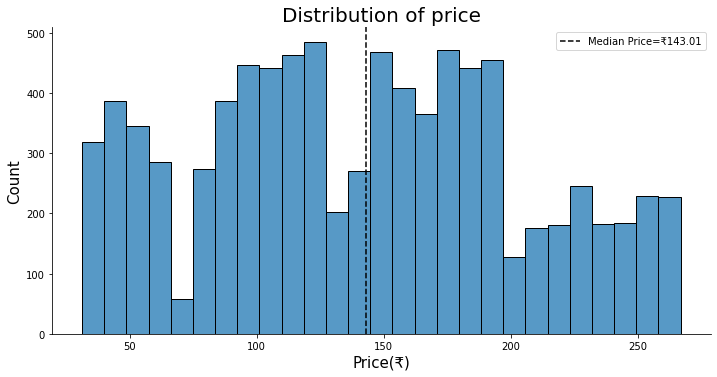

In [108]:
# check distribution of price
p = sns.displot(data=df_sales, x='Item_MRP', aspect=2)
median = df_sales['Item_MRP'].median()
p.ax.axvline(median, color='k', ls='--', label=f'Median Price=₹{median:,.2f}')
p.ax.legend()
plt.xlabel('Price(₹)', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of price', fontsize=20)
plt.show()


Most of the products have a price between 30 and 190. The median price is 143.01 and the maximun valor is about 260.  

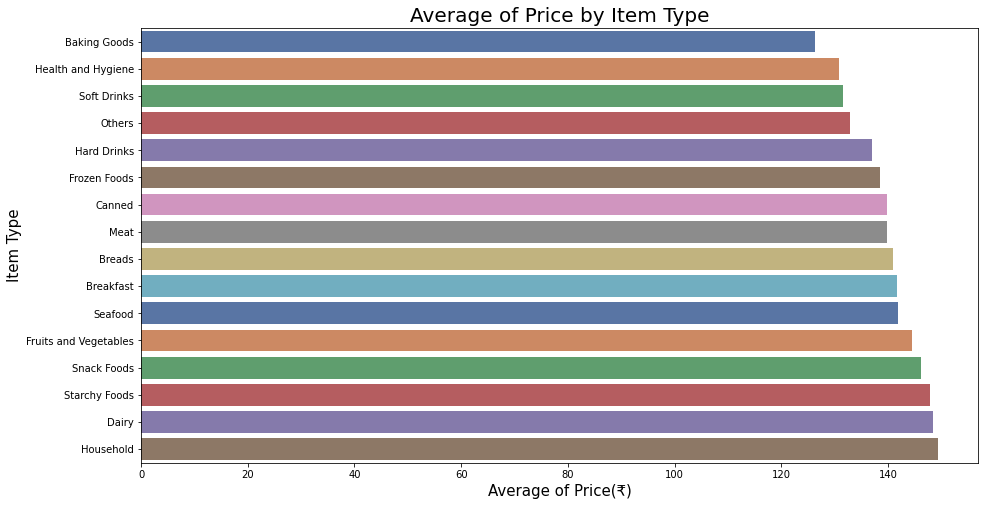

In [109]:
# check the price by item type
plt.figure(figsize=(15,8))
df_price_type = df_sales.groupby('Item_Type')['Item_MRP'].mean().reset_index()
df = df_price_type.sort_values(by=['Item_MRP'])
sns.barplot(data=df, x='Item_MRP', y='Item_Type', palette='deep')

plt.ylabel('Item Type', fontsize=15);
plt.xlabel('Average of Price(₹)', fontsize=15);
plt.title('Average of Price by Item Type', fontsize=20);
plt.suptitle('');
plt.show()


If we analyze the average price we can see that the baking goods are the cheapest products and the Starchy foods, dairy and household are more expensives products. 

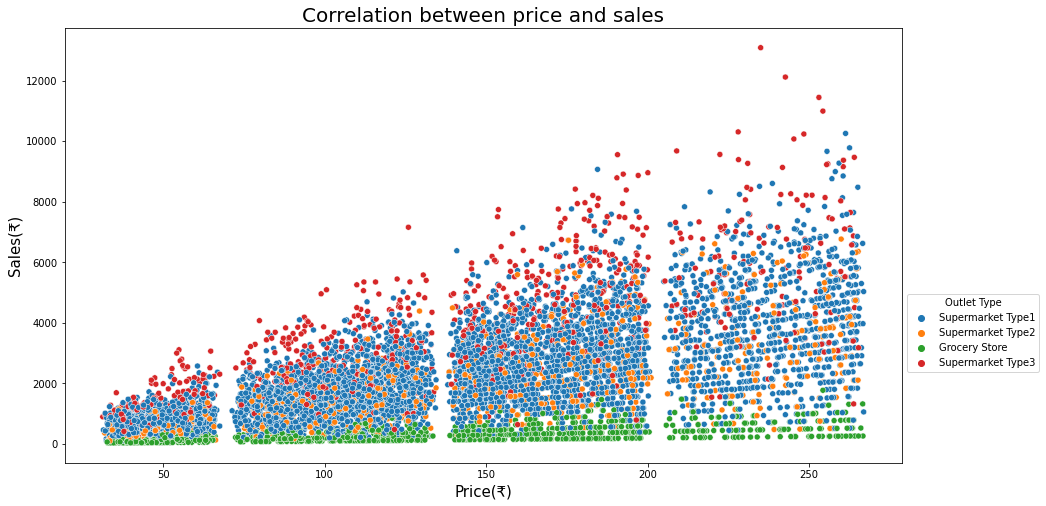

In [110]:
#correlation between price and sales
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_sales, x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type')
plt.title('Correlation between price and sales', fontsize=20)
plt.ylabel('Sales(₹)', fontsize=15)
plt.xlabel('Price(₹)', fontsize=15)

plt.legend(bbox_to_anchor=(1,0.4), title = 'Outlet Type')

plt.show()


In supermarket type 3 there is a positive correlation between price and sales number. In others type of outlet is hard to see this correlation. 

## Explanatory Visuals

In [111]:
# check outlet with better sales 
df_group_type_outlet = df_sales.groupby(['Outlet_Type', 'Outlet_Identifier']).mean().reset_index()
df_sorted = df_group_type_outlet.sort_values('Item_Outlet_Sales')

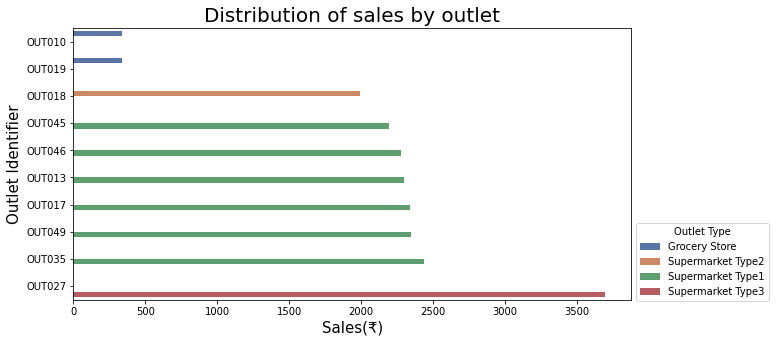

In [112]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_sorted, x='Item_Outlet_Sales', y='Outlet_Identifier', hue='Outlet_Type', palette='deep')
plt.legend(bbox_to_anchor=(1,0.3), title= 'Outlet Type' )
plt.title('Distribution of sales by outlet', fontsize=20)
plt.xlabel('Sales(₹)', fontsize=15)
plt.ylabel('Outlet Identifier', fontsize=15)
#patch.set_width(.3)
plt.show()

The outlet OUT027, wich is a supermarket type 3, has better sales than others outlet. Supermarkets type 1 and 2 have similar sales and grocery stores OUT010, OUT019 have lower sales.

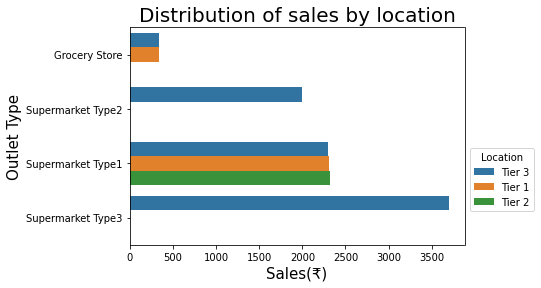

In [113]:
# check if location of outlet is related with better sales.  

location_sales = df_sales.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Item_Outlet_Sales'].mean().reset_index()
location_sales_sorted = location_sales.sort_values('Item_Outlet_Sales')
sns.barplot(data=location_sales_sorted, x='Item_Outlet_Sales', y='Outlet_Type', hue= 'Outlet_Location_Type')
plt.title('Distribution of sales by location', fontsize=20)
plt.xlabel('Sales(₹)', fontsize=15)
plt.ylabel('Outlet Type', fontsize=15)
plt.legend(bbox_to_anchor=(1,0.3), title= 'Location')
plt.show()



The type of the area in which the store is located is not related with better sales. Because in Tier 3 are located Supermarket type 3 with better sales and grocery store with lower sales. Supermarket type 1 are located in all tier and there is no sales difference.  

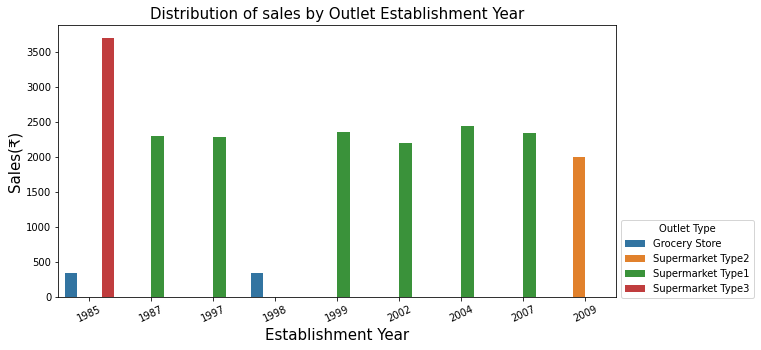

In [121]:
# check if The year in which store was established is related with better sales. 
plt.figure(figsize=(10,5))
year_sales = df_sales.groupby(['Outlet_Establishment_Year', 'Outlet_Type'])['Item_Outlet_Sales'].mean().reset_index()
year_sales_sorted = year_sales.sort_values('Item_Outlet_Sales')
sns.barplot(data=year_sales_sorted, y='Item_Outlet_Sales', hue= 'Outlet_Type',  x = 'Outlet_Establishment_Year')
plt.title('Distribution of sales by Outlet Establishment Year', fontsize=15)
plt.ylabel('Sales(₹)', fontsize=15)
plt.xlabel('Establishment Year', fontsize=15)
plt.legend(bbox_to_anchor=(1,0.3), title= 'Outlet Type')
plt.xticks(rotation = 90)
plt.xticks(rotation = 25)
plt.show()


The year in which stores were established is not related with better sales.  In 1985 were established Grocery Store with lower sales and Supermarket Type 3 with high sales number.  